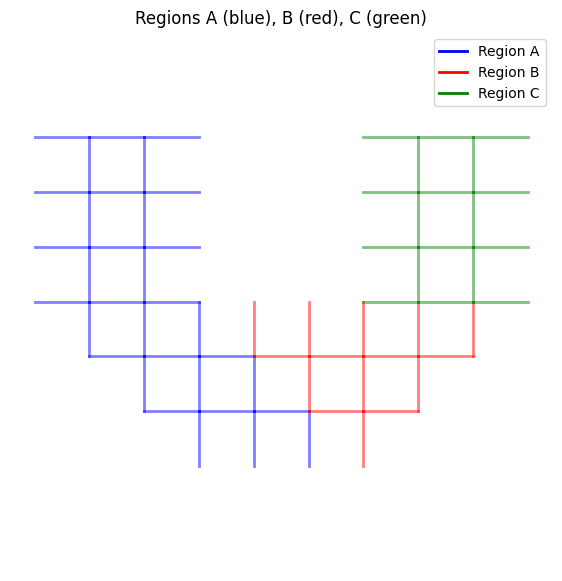

setA: {((0, 2), 'H'), ((0, 1), 'H'), ((5, 5), 'V'), ((2, 2), 'H'), ((1, 0), 'H'), ((5, 4), 'V'), ((3, 2), 'H'), ((4, 2), 'V'), ((2, 1), 'V'), ((5, 4), 'H'), ((1, 1), 'V'), ((4, 3), 'V'), ((4, 1), 'H'), ((3, 0), 'H'), ((3, 1), 'V'), ((1, 2), 'V'), ((4, 4), 'V'), ((4, 2), 'H'), ((2, 1), 'H'), ((3, 3), 'V'), ((1, 1), 'H'), ((5, 2), 'H'), ((5, 3), 'V'), ((4, 3), 'H'), ((3, 1), 'H'), ((1, 2), 'H'), ((0, 2), 'V'), ((2, 0), 'H'), ((0, 1), 'V'), ((2, 2), 'V'), ((5, 3), 'H'), ((0, 0), 'H'), ((3, 2), 'V')}
setB: {((3, 4), 'V'), ((4, 5), 'H'), ((4, 5), 'V'), ((5, 5), 'H'), ((3, 5), 'V'), ((4, 7), 'H'), ((4, 6), 'H'), ((4, 7), 'V'), ((3, 8), 'V'), ((4, 6), 'V'), ((3, 7), 'V'), ((5, 6), 'H'), ((5, 6), 'V'), ((4, 4), 'H'), ((3, 6), 'V')}
setC: {((2, 6), 'H'), ((3, 6), 'H'), ((0, 8), 'H'), ((0, 8), 'V'), ((0, 7), 'H'), ((1, 6), 'H'), ((0, 6), 'H'), ((0, 7), 'V'), ((3, 8), 'H'), ((2, 8), 'H'), ((2, 7), 'H'), ((2, 8), 'V'), ((2, 7), 'V'), ((1, 8), 'H'), ((1, 7), 'H'), ((1, 8), 'V'), ((3, 7), 'H'), ((1,

In [46]:
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import random
import math
from itertools import chain
import string

def get_edges(n):
    '''
    left-top corner is (0, 0)
    The plaquette is made of two side rectangles (2n * n) and one middle square (n*n) with boundary removed except for the top boundary.
    '''
    edges = []    
    # Horizontal edges for the top-left and top-right block
    for r in range(n):
        for c in range(n):
            edge1 = ((r, c), 'H')
            edge2 = ((r, c+2*n), 'H')
            edges.append(edge1)
            edges.append(edge2)
            
    # Vertical edges for the top-left and top-right block
    for r in range(n):
        for c in range(n):
            edge1 = ((r, c), 'V')
            if c == 0 :
                continue
            edges.append(edge1)
    for r in range(n):
        for c in range(n):
            edge2 = ((r, c+2*n), 'V')
            if c == 0 and r < n :
                continue
            edges.append(edge2)
    # left-bottom corner
    for r in range (n):
        for c in range(n-r-1, -1, -1):
            edge = ((n+r, r+c), 'H')
            edges.append(edge)
            
    for r in range (n):
        for c in range(n-r):
            edge = ((n+r, n-c), 'V')
            edges.append(edge)
    # right-bottom corner
    for r in range (n):
        for c in range(n-r, 0, -1):
            edge = ((n+r, 3*n-(r+c)), 'H')
            edges.append(edge)
    for r in range (n):
        for c in range(n-r):
            edge = ((n+r, 2*n+c), 'V')
            edges.append(edge)
    
    # Vertical edges for the left for the middle square
    for i in range(n):
        edge = ((n+i, n), 'V')
        edges.append(edge)
    # Horizontal edges for the middle square
    for r in range(n-1):
        for c in range(n):
            edge = ((r+n+1, c+n), 'H')
            edges.append(edge)    
            
    # Vertical edges for the middle square
    for r in range(n):
        for c in range(n-1):
            edge = ((r+n, c+n+1), 'V')
            edges.append(edge)
    return edges


def edges_of_plaquette(r, c):
    """
    Return the 4 canonical edges of the plaquette with top-left corner (r,c).
    """
    return [((r, c), 'H'), ((r+1, c), 'H'), ((r, c), 'V'), ((r, c+1), 'V')]

def define_B_and_C(n):
    all_edges = set(get_edges(n))  
    setC = set()
    for r in range(n):
        for c in range(n):
            for e in edges_of_plaquette(r, c+2*n):
                if e not in setC:
                    setC.add(e)
    C_vertex_boundary = [(n, 2*n + i) for i in range(n+1)] 
    
    def left_below_edges(r, c):
        res = []
        if r > 0: res.append(((r, c-1), 'H'))
        res.append(((r, c), 'V'))
        return res

    setB = set()
    # Extending the grid distance by n steps.
    for i in range(n):
        for (r, c) in C_vertex_boundary:
            for e in left_below_edges(r, c):
                if e not in setB and e not in setC:
                    setB.add(e)
        new_boundary = []
        for (r, c) in C_vertex_boundary:
            new_boundary.append((r+1, c))
        for (r, c) in C_vertex_boundary:
            if (r, c-1) not in C_vertex_boundary:
                new_boundary.append((r, c-1))
        C_vertex_boundary = new_boundary
    
    setA = all_edges - setB - setC
    
    return setA, setB, setC

# ----- Plotting Regions A, B, and C -----

def plot_regions(n):
    """
    Plot the lattice showing regions A, B, and C in different colors.
    Region A: edges in A (blue)
    Region B: edges in B (red)
    Region C: edges in C (green)
    """
    allEdges = set(get_edges(n))
    setA, setB, setC = define_B_and_C(n)
    # Ensure each region only contains allowed edges.
    setA = setA.intersection(allEdges)
    setB = setB.intersection(allEdges)
    setC = setC.intersection(allEdges)
    plt.figure(figsize=(7, 7))
    
    # Plot all edges in A (blue)
    for edge in setA:
        (r, c), typ = edge
        if typ == 'H':
            x1, y1 = c, r
            x2, y2 = c+1, r
        else:
            x1, y1 = c, r
            x2, y2 = c, r+1
        plt.plot([x1, x2], [y1, y2], color='blue', lw=2, alpha = 0.5)
    
    # Plot all edges in B (red)
    for edge in setB:
        (r, c), typ = edge
        if typ == 'H':
            x1, y1 = c, r
            x2, y2 = c+1, r
        else:
            x1, y1 = c, r
            x2, y2 = c, r+1
        plt.plot([x1, x2], [y1, y2], color='red', lw=2, alpha = 0.5)
    
    # Plot all edges in C (green)
    for edge in setC:
        (r, c), typ = edge
        if typ == 'H':
            x1, y1 = c, r
            x2, y2 = c+1, r
        else:
            x1, y1 = c, r
            x2, y2 = c, r+1
        plt.plot([x1, x2], [y1, y2], color='green', lw=2, alpha = 0.5)
    
    # Add a legend manually.
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color='blue', lw=2, label='Region A'),
                       Line2D([0], [0], color='red', lw=2, label='Region B'),
                       Line2D([0], [0], color='green', lw=2, label='Region C')]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.title("Regions A (blue), B (red), C (green)")
    plt.xlim(-0.5, n+0.5)
    plt.ylim(-0.5, n+0.5)
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.axis('off')
    plt.show()
    print("setA:", setA)
    print("setB:", setB)
    print("setC:", setC)
    return setA, setB, setC
n = 3
setA, setB, setC = plot_regions(n)


In [33]:



# 1. Local tensor initialization
###############################################################################
# Indices are counted from the top boundary; for a full plaquette 
# (with 4 edges) we define:
#   T_{ijkl} = δ_{(i+j+k+l) mod 2, 0} * 1  + δ_{(i+j+k+l) mod 2, 1} * (1-2p)
# with the ordering [top, left, right, bottom]. Then we sum over the top index.
def full_tensor(p):
    T = np.zeros((2, 2, 2, 2))
    for i in (0, 1):
        for j in (0, 1):
            for k in (0, 1):
                for l in (0, 1):
                    if (i + j + k + l) % 2 == 0:
                        T[i, j, k, l] = 1.0/2
                    else:
                        T[i, j, k, l] = (1 - 2 * p)/2
    return T


def incomplete_tensor(p):
    T = np.zeros((2, 2, 2))
    for i in (0, 1):
        for j in (0, 1):
            for k in (0, 1):
                if (i + j + k) % 2 == 0:
                    T[i, j, k] = 1.0/2
                else:
                    T[i, j, k] = (1 - 2 * p)/2
    return T


def corner_tensor(p):
    T = np.zeros((2, 2))
    for i in (0, 1):
        for j in (0, 1):
            if (i + j) % 2 == 0:
                T[i, j] = 1.0/2
            else:
                T[i, j] = (1 - 2 * p)/2
    return T


def boundary_full_tensor(p):
    """
    For a full plaquette at the top boundary, the top index is summed over.
    Input full_tensor returns a tensor of shape (2,2,2,2) with indices 
    [top, left, right, bottom]. Summing over the top index gives a tensor 
    of shape (2,2,2) with indices [left, right, bottom].
    """
    T_full = full_tensor(p)  # shape (2,2,2,2)
    T_top = np.sum(T_full, axis=0)
    return T_top


def boundary_incomplete_tensor(p):
    """
    For an incomplete (boundary) plaquette (with only 3 edges), sum over the
    top index to obtain a tensor of shape (2,2). The indices represent the 
    horizontal bond (the one that would have been 'left' if on the right side) 
    and the free vertical bond.
    """
    T_inc = incomplete_tensor(p)  # shape (2,2,2)
    T_top_inc = np.sum(T_inc, axis=0)
    return T_top_inc


###############################################################################
# 2. Initialization of the top row of plaquette tensors
###############################################################################
def initial_contraction_top(n, p):
    """
    Build a list of n tensors corresponding to the top row.
    The leftmost and rightmost are boundary_incomplete (shape (2,2)),
    and the ones in between are boundary_full (shape (2,2,2)).
    """
    tensor_list = []
    tensor_list.append(boundary_incomplete_tensor(p))  # Left boundary (shape (2,2))
    for i in range(n - 2):
        tensor_list.append(boundary_full_tensor(p))  # Middle plaquettes (shape (2,2,2))
    tensor_list.append(boundary_incomplete_tensor(p))  # Right boundary (shape (2,2))
    return tensor_list

def initial_contraction_bulk(n, p):
    tensor_list = []
    tensor_list.append(incomplete_tensor(p))  # Left boundary (shape (2,2))
    for i in range(n - 2):
        tensor_list.append(full_tensor(p))
    # Middle plaquettes (shape (2,2,2))
    tensor_list.append(incomplete_tensor(p))  # Right boundary (shape (2,2))
    return tensor_list

###############################################################################
# 3. Contracting the top-boundary tensors via a custom einsum
###############################################################################

def contract_top_boundary(n, p):
    """
    Contract the list of n top-boundary tensors from left to right. 
    We label the horizontal (internal) indices by letters that are contracted,
    while the free vertical bonds remain. The final result is a tensor with
    n free indices (one per plaquette), each of dimension 2.
    
    For our contraction we assign:
      - T1 (leftmost, shape (2,2)):  indices = (a, A)
      - T_i for i=2,..., n-1 (shape (2,2,2)): indices = (a_{i-1}, a_i, A_i)
      - T_n (rightmost, shape (2,2)): indices = (a_{n-1}, A_n)
      
    The contraction over the horizontal indices {a_i} then yields:
      R_{A1, A2, ..., A_n} = sum_{a1,..., a_{n-1}} T1 * T2 * ... * T_n.
    """
    # Define the labels for the indices.
    top_label = string.ascii_letters[:n]
    virtual_label = string.ascii_letters[n:2*n]
    bottom_label = string.ascii_letters[2*n:3*n]
    ###############################################################################
     # Initialize the tensor list.
    tensor_list = initial_contraction_top(n, p)

    # We need to build an einsum string. For simplicity we use letters from
    # the Latin alphabet. (This scheme works for n small enough, e.g. n<=26.)

    einsum_terms = []
    # Left boundary tensor: shape (2,2) → assign indices: [top, horizontal, bottom]
    term = bottom_label[0] + virtual_label[0]
    einsum_terms.append(term)
    
    # For middle tensors (i = 2,..., n-1): shape (2,2,2) -> assign indices: 
    # (left, right, vertical) = (horizontals[i-1], horizontals[i], verticals[i])
    for i in range(1, n - 1):
        term = virtual_label[i - 1] + bottom_label[i] + virtual_label[i]
        einsum_terms.append(term)

    # Rightmost tensor: shape (2,2) -> assign indices: (left, vertical) = (horizontals[n-2], verticals[n-1])
    einsum_terms.append(virtual_label[n - 2] + bottom_label[n - 1])

    # The output indices are the vertical ones from every tensor
    output_subscript = "".join(bottom_label[i] for i in range(n))
    einsum_str = ",".join(einsum_terms) + "->" + output_subscript
    #print("Einsum string:", einsum_str)

    # Now perform the contraction.
    result = np.einsum(einsum_str, *tensor_list, optimize=True)
    return result

def contract_boundary_bulk(n, p, top_tensor):
    """
    Contract the list of n bulk tensors with the top from left to right. 
    We label the horizontal (internal) indices by letters that are contracted,
    while the free vertical bonds remain. The final result is a tensor with
    n free indices (one per plaquette), each of dimension 2.
    
    For our contraction we assign:
      - T1 (leftmost, shape (2,2)):  indices = (a, h_1, A)
      - T_i for i=2,..., n-1 (shape (2,2,2)): indices = (a_{i-1}, a_i, A_i)
      - T_n (rightmost, shape (2,2)): indices = (a_{n-1}, A_n)
      
    The contraction over the horizontal indices {a_i} then yields:
      R_{A1, A2, ..., A_n} = sum_{a1,..., a_{n-1}} T1 * T2 * ... * T_n.
    """
    top_label = string.ascii_letters[:n]
    virtual_label = string.ascii_letters[n:2*n]
    bottom_label = string.ascii_letters[2*n:3*n]
    
    # Initialize the tensor list with the top tensor and the bulk tensor
    tensor_list = []
    tensor_list.append(top_tensor)
    tensors = initial_contraction_bulk(n, p)
    for i in tensors:
        tensor_list.append(i)

    # Build einsum terms for horizontal contraction.
    einsum_terms = []
    # top terms of the previous tensor
    top_terms = "".join(top_label[i] for i in range(n))
    einsum_terms.append(top_terms)
    
    # Left boundary tensor: shape (2,2,2) → assign indices: [top, horizontal, bottom]
    term = top_label[0] + virtual_label[0] + bottom_label[0]
    einsum_terms.append(term)
    
    # Middle tensors: for i = 1 to n-2, shape (2,2,2,2) → indices: [top, left_horizontal, right_horizontal, bottom]
    for i in range(1, n-1):
        term = top_label[i] + virtual_label[i-1] + virtual_label[i] + bottom_label[i]
        einsum_terms.append(term)
    
    # Right boundary tensor: shape (2,2,2) → assign indices: [top, horizontal, bottom]
    term = top_label[n-1] + virtual_label[n-2] + bottom_label[n-1]
    einsum_terms.append(term)
    
    # The horizontal (virtual) indices will be contracted.
    # The output free indices are: first the top indices of each bulk tensor, then all the bottom indices.
    output_subscript = "".join(bottom_label[i] for i in range(n))
    einsum_str_bulk = ",".join(einsum_terms) + "->" + output_subscript
    #print("Bulk row einsum string:", einsum_str_bulk)
    
    final_tensor = np.einsum(einsum_str_bulk, *tensor_list)
    # final_tensor has shape (2,2,...,2) with n free indices.
    
    return final_tensor

def contract_ladder(n, p, initial_tensor):
    # Initialize the label
    top_label = string.ascii_letters[:n]
    virtual_label = string.ascii_letters[n:2*n+1]
    bottom_label = string.ascii_letters[2*n+1:3*n]
    
    # Initialize the tensor list with the top tensor and the bulk tensor
    for i in range(n-1):
        tensor_list = []
        einsum_terms = []
        # top tensor to the list
        tensor_list.append(initial_tensor)
        # Here we doesn't care whether it's the real top label or not, just the initial label
        einsum_terms.append("".join(top_label[k] for k in range(n-i))+"".join(virtual_label[k] for k in range(i)))
  
        # corner to the list
        corner = corner_tensor(p)
        tensor_list.append(corner)
        einsum_terms.append(top_label[0]+virtual_label[i])
        for j in range(n-i-1):
            tensor_list.append(full_tensor(p))
            einsum_terms.append(virtual_label[i+j]+top_label[j+1]+virtual_label[i+j+1]+bottom_label[j])
        output_subscript = "".join(virtual_label[k] for k in range(i))+"".join(bottom_label[k] for k in range(n-i-1)) + virtual_label[i]
        einsum_str = ",".join(einsum_terms) + "->" + output_subscript
        new_tensor = np.einsum(einsum_str, *tensor_list)
        initial_tensor = new_tensor
    ###############################################################################
    tensor_list = []
    einsum_terms = []
    
    tensor_list.append(initial_tensor)
    einsum_terms.append("".join(top_label[k] for k in range(n-1))+virtual_label[n-1])
    
    corner = corner_tensor(p)
    tensor_list.append(corner)
    einsum_terms.append(virtual_label[n-1]+top_label[n-1])
    output_subscript = "".join(top_label[k] for k in range(n))
    einsum_str = ",".join(einsum_terms) + "->" + output_subscript
    new_tensor = np.einsum(einsum_str, *tensor_list)
    
    return new_tensor

def S_B(n, p):
    top_label = string.ascii_letters[:n]
    virtual_label = string.ascii_letters[n:2*n]
    bottom_label = string.ascii_letters[2*n:3*n]
    
    # top indice and virtual indice are swapped in direction
    initial_tensor = incomplete_tensor(p)
    a0 = np.array([1. , 1 - 2*p])
    initial_tensor = np.einsum("abc,a->bc", initial_tensor, a0)
    init_corner = corner_tensor(p)
    initial_tensor = np.einsum("ab,bc->ac", initial_tensor, init_corner)
    for i in range(2, n):
        tensor_list = []
        einsum_terms = []
        # top tensor to the list
        tensor_list.append(initial_tensor)
        einsum_terms.append("".join(top_label[k] for k in range(i)))
        # top incomplete tensor
        tensor_list.append(incomplete_tensor(p))
        einsum_terms.append(top_label[0]+virtual_label[0]+bottom_label[0])
        # middle full tensor
        for j in range(1, i):
            tensor_list.append(full_tensor(p))
            einsum_terms.append(top_label[j]+virtual_label[j-1]+virtual_label[j]+bottom_label[j])
        # bottom corner tensor
        tensor_list.append(corner_tensor(p))
        einsum_terms.append(virtual_label[i-1]+bottom_label[i])
        
        output_subscript = "".join(bottom_label[k] for k in range(i+1))
        einsum_str = ",".join(einsum_terms) + "->" + output_subscript
        new_tensor = np.einsum(einsum_str, *tensor_list)
        initial_tensor = new_tensor
    
    flat_tensor = np.reshape(initial_tensor, -1)
    renyi = -np.log(np.sum(flat_tensor**2))
    
    return renyi

def S_turn(n, p , initial_tensor):
    top_label = string.ascii_letters[:n]
    virtual_label = string.ascii_letters[n:2*n]
    bottom_label = string.ascii_letters[2*n:3*n]
    
    
    for i in range(n-1):
        # top indice and virtual indice are swapped in direction
        tensor_list = []
        einsum_terms = []
        # top tensor to the list
        tensor_list.append(initial_tensor)
        einsum_terms.append("".join(top_label[k] for k in range(n-i)))
        # top corner tensor
        corner = corner_tensor(p)
        tensor_list.append(corner)
        einsum_terms.append(top_label[0]+virtual_label[0])
        # middle full tensor
        for j in range(1, n-i-1):
            tensor_list.append(full_tensor(p))
            einsum_terms.append(top_label[j]+virtual_label[j-1]+virtual_label[j]+bottom_label[j])
        # bottom imcomplete tensor
        tensor_list.append(incomplete_tensor(p))
        einsum_terms.append(top_label[n-i-1]+virtual_label[n-i-2]+bottom_label[n-i-1])
        output_subscript = "".join(bottom_label[k] for k in range(1, n-i))
        einsum_str = ",".join(einsum_terms) + "->" + output_subscript
        #print("einsum_str:", einsum_str)
            
        new_tensor = np.einsum(einsum_str, *tensor_list)
        initial_tensor = new_tensor
    
    return -np.log(initial_tensor[0]+(1-2*p)*initial_tensor[1])


###############################################################################
# 4. Main demonstration
###############################################################################
CMI = []
prob = np.concatenate((np.linspace(0., 0.4, 8), np.linspace(0.41, 0.5, 20)))
for n in range(1, 2):
    for  p in prob:
        # Perform the contraction of the top-boundary row.
        top_tensor = contract_top_boundary(n, p)
        for i in range(n-1):
            final_tensor = contract_boundary_bulk(n, p, top_tensor)
            top_tensor = final_tensor
        top_tensor = contract_ladder(n, p, top_tensor)
        renyi_BC = S_turn(n, p, top_tensor)
        for i in range(n):
            final_tensor = contract_boundary_bulk(n, p, top_tensor)
            top_tensor = final_tensor
        renyi_AB = S_turn(n, p, top_tensor)
        
        top_tensor = contract_ladder(n, p, top_tensor)
        for i in range(n):
            final_tensor = contract_boundary_bulk(n, p, top_tensor)
            top_tensor = final_tensor
        renyi_ABC = -np.log(np.sum(top_tensor))
        
        #S_C = trace(top initialization * bulk contraction^(n-1))
        renyi_B = S_B(n, p)
        #S_AB = trace(top initialization * bulk contraction^(n-1) * ladder contraction * bulk contraction^n * ladder contraction)
        
        #S_ABC = trace(top initialization * bulk contraction^(n-1) * ladder contraction * bulk contraction^n * ladder contraction * bulk contraction^n)
        CMI.append(renyi_AB+renyi_BC-renyi_ABC-renyi_B)

print("Renyi-2 entropy of region AB:", renyi_AB)
print("Renyi-2 entropy of region B:", renyi_B)
print("Renyi-2 entropy of region BC:", renyi_BC)
print("Renyi-2 entropy of region ABC:", renyi_ABC)
print("CMI:", renyi_AB+renyi_BC-renyi_ABC-renyi_B)
print("Shape of contracted top-boundary tensor:", top_tensor.shape)
print("Shape of contracted bulk tensor:", final_tensor.shape)
print(final_tensor)
# The expected shape is (2,2,...,2) with n indices, i.e. a shape tuple (2,2,2,...,2) of length n.


Renyi-2 entropy of region AB: 2.0794415416798357
Renyi-2 entropy of region B: 2.0794415416798357
Renyi-2 entropy of region BC: 1.3862943611198906
Renyi-2 entropy of region ABC: 2.772588722239781
CMI: -1.3862943611198908
Shape of contracted top-boundary tensor: (2,)
Shape of contracted bulk tensor: (2,)
[0.03125 0.03125]


In [64]:
import jax
import jax.numpy as jnp
import string

# 1. Local tensor initialization

def full_tensor(p):
    """Construct a full tensor T of shape (2,2,2,2)."""
    T = jnp.zeros((2, 2, 2, 2))
    # Loop over all indices and update via the immutable update API.
    for i in (0, 1):
        for j in (0, 1):
            for k in (0, 1):
                for l in (0, 1):
                    value = jnp.where((i + j + k + l) % 2 == 0, 1.0/2, (1 - 2 * p)/2)
                    T = T.at[i, j, k, l].set(value)
    return T

def incomplete_tensor(p):
    """Construct an incomplete tensor T of shape (2,2,2)."""
    T = jnp.zeros((2, 2, 2))
    for i in (0, 1):
        for j in (0, 1):
            for k in (0, 1):
                value = jnp.where((i + j + k) % 2 == 0, 1.0/2, (1 - 2 * p)/2)
                T = T.at[i, j, k].set(value)
    return T

def corner_tensor(p):
    """Construct a corner tensor T of shape (2,2)."""
    T = jnp.zeros((2, 2))
    for i in (0, 1):
        for j in (0, 1):
            value = jnp.where((i + j) % 2 == 0, 1.0/2, (1 - 2 * p)/2)
            T = T.at[i, j].set(value)
    return T

def boundary_full_tensor(p):
    """
    For a full plaquette at the top boundary: sum over the top index of the
    full tensor (shape (2,2,2,2)) to yield a tensor of shape (2,2,2).
    """
    T_full = full_tensor(p)  # shape (2,2,2,2)
    T_top = jnp.sum(T_full, axis=0)
    return T_top

def boundary_incomplete_tensor(p):
    """
    For an incomplete (boundary) plaquette with 3 edges:
      sum over the top index to obtain a tensor of shape (2,2).
    """
    T_inc = incomplete_tensor(p)  # shape (2,2,2)
    T_top_inc = jnp.sum(T_inc, axis=0)
    return T_top_inc


# 2. Initialization of the top row of plaquette tensors

def initial_contraction_top(n, p):
    """
    Build a list of n tensors corresponding to the top row.
    The leftmost and rightmost are boundary incomplete (shape (2,2)),
    while the ones in between are boundary full (shape (2,2,2)).
    """
    tensor_list = []
    tensor_list.append(boundary_incomplete_tensor(p))  # left boundary, shape (2,2)
    for _ in range(n - 2):
        tensor_list.append(boundary_full_tensor(p))  # middle plaquettes, shape (2,2,2)
    tensor_list.append(boundary_incomplete_tensor(p))  # right boundary, shape (2,2)
    return tensor_list

def initial_contraction_bulk(n, p):
    """
    Build a list of n tensors for the bulk contraction.
      Left and right boundaries: incomplete_tensor (shape (2,2)).
      Middle plaquettes: full_tensor (shape (2,2,2)).
    """
    tensor_list = []
    tensor_list.append(incomplete_tensor(p))  # left boundary, shape (2,2)
    for _ in range(n - 2):
        tensor_list.append(full_tensor(p))  # middle plaquettes
    tensor_list.append(incomplete_tensor(p))  # right boundary, shape (2,2)
    return tensor_list


# 3. Contracting the top-boundary tensors via a custom einsum

@partial(jax.jit, static_argnums=(0,))
def contract_top_boundary(n, p):
    """
    Contract a list of n top-boundary tensors from left to right.
    The free vertical indices remain, and internal (horizontal) indices are contracted.
    """
    # Define labels for the indices.
    top_label = string.ascii_letters[:n]
    virtual_label = string.ascii_letters[n:2*n]
    bottom_label = string.ascii_letters[2*n:3*n]

    # Initialize the tensor list.
    tensor_list = initial_contraction_top(n, p)

    einsum_terms = []
    # Left boundary tensor: shape (2,2) → assign indices: [bottom_label[0], virtual_label[0]]
    einsum_terms.append(bottom_label[0] + virtual_label[0])
    
    # Middle tensors (i = 2,..., n-1): shape (2,2,2)
    for i in range(1, n - 1):
        term = virtual_label[i - 1] + bottom_label[i] + virtual_label[i]
        einsum_terms.append(term)

    # Rightmost tensor: shape (2,2)
    einsum_terms.append(virtual_label[n - 2] + bottom_label[n - 1])

    # The output indices are given by the vertical bonds.
    output_subscript = "".join(bottom_label[i] for i in range(n))
    einsum_str = ",".join(einsum_terms) + "->" + output_subscript
    # Perform the contraction (without optimize=True, since JAX does not support it)
    result = jnp.einsum(einsum_str, *tensor_list)
    return result

@partial(jax.jit, static_argnums=(0,))
def contract_boundary_bulk(n, p, top_tensor):
    """
    Contract the list of n bulk tensors with the top tensor from left to right.
    """
    top_label = string.ascii_letters[:n]
    virtual_label = string.ascii_letters[n:2*n]
    bottom_label = string.ascii_letters[2*n:3*n]
    
    tensor_list = []
    # Start with the top_tensor.
    tensor_list.append(top_tensor)
    # Append the bulk tensors.
    bulk_tensors = initial_contraction_bulk(n, p)
    for tensor in bulk_tensors:
        tensor_list.append(tensor)

    einsum_terms = []
    # Top part: using the top indices from top_tensor.
    top_terms = "".join(top_label[i] for i in range(n))
    einsum_terms.append(top_terms)
    
    # Left boundary bulk tensor (shape (2,2,2))
    einsum_terms.append(top_label[0] + virtual_label[0] + bottom_label[0])
    
    # Middle bulk tensors.
    for i in range(1, n - 1):
        term = top_label[i] + virtual_label[i-1] + virtual_label[i] + bottom_label[i]
        einsum_terms.append(term)
    
    # Right boundary bulk tensor.
    einsum_terms.append(top_label[n-1] + virtual_label[n-2] + bottom_label[n-1])
    
    # The output indices are chosen to be the bottom indices.
    output_subscript = "".join(bottom_label[i] for i in range(n))
    einsum_str_bulk = ",".join(einsum_terms) + "->" + output_subscript

    final_tensor = jnp.einsum(einsum_str_bulk, *tensor_list)
    return final_tensor

@partial(jax.jit, static_argnums=(0,))
def contract_ladder(n, p, initial_tensor):
    """
    Perform a ladder contraction over n tensors.
    """
    top_label = string.ascii_letters[:n]
    virtual_label = string.ascii_letters[n:2*n+1]
    bottom_label = string.ascii_letters[2*n+1:3*n]

    tensor = initial_tensor
    for i in range(n-1):
        tensor_list = []
        einsum_terms = []
        # Append current top tensor.
        tensor_list.append(tensor)
        term = "".join(top_label[k] for k in range(n-i)) + "".join(virtual_label[k] for k in range(i))
        einsum_terms.append(term)
  
        # Append the corner tensor.
        corner = corner_tensor(p)
        tensor_list.append(corner)
        einsum_terms.append(top_label[0] + virtual_label[i])
        for j in range(n-i-1):
            tensor_list.append(full_tensor(p))
            einsum_terms.append(virtual_label[i+j] + top_label[j+1] + virtual_label[i+j+1] + bottom_label[j])
        output_subscript = "".join(virtual_label[k] for k in range(i)) + "".join(bottom_label[k] for k in range(n-i-1)) + virtual_label[i]
        einsum_str = ",".join(einsum_terms) + "->" + output_subscript
        tensor = jnp.einsum(einsum_str, *tensor_list)
    # Final contraction step.
    tensor_list = []
    einsum_terms = []
    
    tensor_list.append(tensor)
    einsum_terms.append("".join(top_label[k] for k in range(n-1)) + virtual_label[n-1])
    
    corner = corner_tensor(p)
    tensor_list.append(corner)
    einsum_terms.append(virtual_label[n-1] + top_label[n-1])
    output_subscript = "".join(top_label[k] for k in range(n))
    tensor = jnp.einsum(",".join(einsum_terms) + "->" + output_subscript, *tensor_list)
    
    return tensor

@partial(jax.jit, static_argnums=(0,))
def S_B(n, p):
    """
    Compute the Renyi entropy S_B from the contraction over bulk tensors.
    """
    top_label = string.ascii_letters[:n]
    virtual_label = string.ascii_letters[n:2*n]
    bottom_label = string.ascii_letters[2*n:3*n]
    
    # Start with an incomplete tensor and contract with a1.
    tensor = incomplete_tensor(p)
    a0 = jnp.array([1.0, 1 - 2 * p])
    tensor = jnp.einsum("abc,a->bc", tensor, a0)
    init_corner = corner_tensor(p)
    tensor = jnp.einsum("ab,bc->ac", tensor, init_corner)
    for i in range(2, n):
        tensor_list = []
        einsum_terms = []
        tensor_list.append(tensor)
        einsum_terms.append("".join(top_label[k] for k in range(i)))
        tensor_list.append(incomplete_tensor(p))
        einsum_terms.append(top_label[0] + virtual_label[0] + bottom_label[0])
        for j in range(1, i):
            tensor_list.append(full_tensor(p))
            einsum_terms.append(top_label[j] + virtual_label[j-1] + virtual_label[j] + bottom_label[j])
        tensor_list.append(corner_tensor(p))
        einsum_terms.append(virtual_label[i-1] + bottom_label[i])
        output_subscript = "".join(bottom_label[k] for k in range(i+1))
        einsum_str = ",".join(einsum_terms) + "->" + output_subscript
        tensor = jnp.einsum(einsum_str, *tensor_list)
    
    flat_tensor = jnp.reshape(tensor, -1)
    renyi = -jnp.log(jnp.sum(flat_tensor**2))
    return renyi

@partial(jax.jit, static_argnums=(0,))
def S_turn(n, p, initial_tensor):
    """
    Compute the Renyi entropy S_turn from the contraction of the top tensor.
    """
    top_label = string.ascii_letters[:n]
    virtual_label = string.ascii_letters[n:2*n]
    bottom_label = string.ascii_letters[2*n:3*n]
    
    tensor = initial_tensor
    for i in range(n-1):
        tensor_list = []
        einsum_terms = []
        tensor_list.append(tensor)
        einsum_terms.append("".join(top_label[k] for k in range(n-i)))
        corner = corner_tensor(p)
        tensor_list.append(corner)
        einsum_terms.append(top_label[0] + virtual_label[0])
        for j in range(1, n-i-1):
            tensor_list.append(full_tensor(p))
            einsum_terms.append(top_label[j] + virtual_label[j-1] + virtual_label[j] + bottom_label[j])
        tensor_list.append(incomplete_tensor(p))
        einsum_terms.append(top_label[n-i-1] + virtual_label[n-i-2] + bottom_label[n-i-1])
        output_subscript = "".join(bottom_label[k] for k in range(1, n-i))
        einsum_str = ",".join(einsum_terms) + "->" + output_subscript
        tensor = jnp.einsum(einsum_str, *tensor_list)
    
    return -jnp.log(tensor[0] + (1 - 2 * p) * tensor[1])


# 4. Main demonstration
CMI = []
# Create a probability array. Using jnp.linspace and jnp.concatenate.
#prob = jnp.concatenate((jnp.linspace(0., 0.4, 8), jnp.linspace(0.41, 0.5, 20)))
prob = jnp.array([0.3])
# Loop over n and p.
# Convert the DeviceArray 'prob' to a regular Python list using .tolist()
for n in range(2, 3):
    for p in prob.tolist():
        # Contract the top-boundary row.
        top_tensor = contract_top_boundary(n, p)
        for _ in range(n-1):
            final_tensor = contract_boundary_bulk(n, p, top_tensor)
            top_tensor = final_tensor
        top_tensor = contract_ladder(n, p, top_tensor)
        renyi_BC = S_turn(n, p, top_tensor)
        for _ in range(n):
            final_tensor = contract_boundary_bulk(n, p, top_tensor)
            top_tensor = final_tensor
        renyi_AB = S_turn(n, p, top_tensor)
        
        top_tensor = contract_ladder(n, p, top_tensor)
        for _ in range(n):
            final_tensor = contract_boundary_bulk(n, p, top_tensor)
            top_tensor = final_tensor
        renyi_ABC = -jnp.log(jnp.sum(top_tensor))
        
        # S_B from the bulk.
        renyi_B = S_B(n, p)
        # Compute the conditional mutual information.
        CMI.append(renyi_AB + renyi_BC - renyi_ABC - renyi_B)

# At this point, CMI is a Python list of JAX scalar values.
print("CMI:", CMI)


CMI: [Array(0.00617728, dtype=float64)]


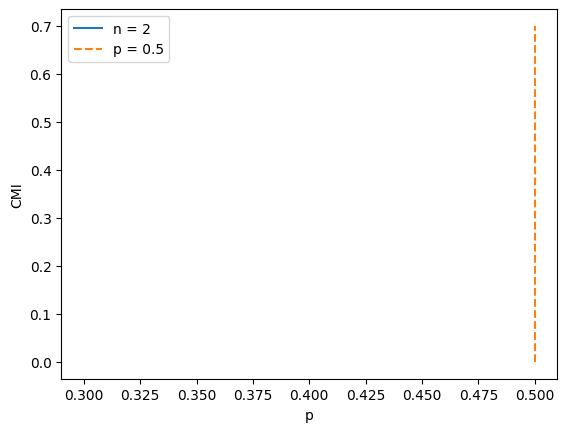

In [65]:
CMI= np.array(CMI).reshape(-1, prob.shape[0])
for i in range(CMI.shape[0]):
    plt.plot(prob, CMI[i], label = "n = "+str(i+2))
plt.plot(np.ones(10)*0.5, np.linspace(0, 0.7, 10), label = "p = 0.5", linestyle = "dashed")
plt.xlabel("p")
plt.ylabel("CMI")
plt.legend()
plt.show()

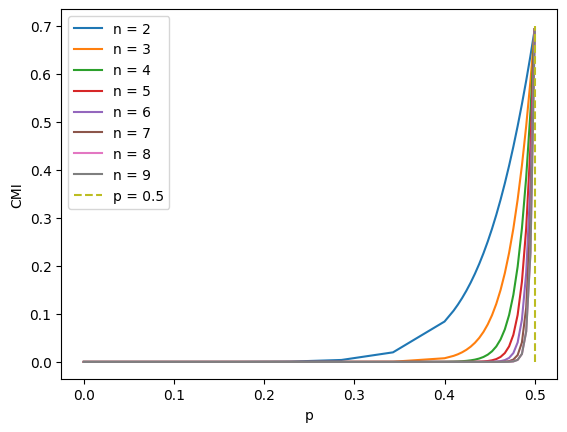

In [29]:
CMI= np.array(CMI).reshape(-1, prob.shape[0])
for i in range(CMI_save.shape[0]):
    plt.plot(prob, CMI_save[i], label = "n = "+str(i+2))
plt.plot(np.ones(10)*0.5, np.linspace(0, 0.7, 10), label = "p = 0.5", linestyle = "dashed")
plt.xlabel("p")
plt.ylabel("CMI")
plt.legend()
plt.show()


In [27]:
CMI_save = np.append(CMI_save, CMI).reshape(-1, prob.shape[0])

In [28]:
print(CMI_save.shape)

(8, 28)


In [47]:
 
def generate_initial_config(edges):
    """
    Generate the initial configuration: a dictionary for all edges (not in D) set to 0 (inactive).
    """
    config = {}
    for e in edges:
        config[e] = 0
    return config

def sample_step(config, all_edges):
    for edge in all_edges:
        p = random.random()
        if p < 0.5:
            config[edge] = 1 - config[edge]
    return config


def sample_configurations(all_edges, num_samples):
    """
    Uniform sampling to get the configurations.
    
    Args:
      num_samples: Number of configurations to sample.
    
    Returns:
      A list of configuration dictionaries.
    """
    samples = []
    config = generate_initial_config(all_edges)
    
    for _ in range(num_samples):
        sample_step(config, all_edges)
        samples.append(config.copy())
    return samples


def region_plaquettes(regionEdges, all_plaq):
    """
    For a given set of allowed edges (regionE
    dges), return the list of plaquettes
    (by their top-left coordinate) that are partially contained in the region.
    """
    plaq = []
    for (r, c) in all_plaq:
        edges = [((r, c), 'H'),
                 ((r+1, c), 'H'),
                 ((r, c), 'V'),
                 ((r, c+1), 'V')]
        if any(e in regionEdges for e in edges):
            plaq.append((r, c))
    return plaq

def region_weight(config, regionPlaquettes, p):
    """
    For a given configuration and region:
      - Count the number of excitations in the plaquettes inside the region.
      - Return the weight (1-2p)^(2 * (# excitations)).
    """
    # Check for active edge outside the region.

    num_excited = 0
    for (r, c) in regionPlaquettes:
        edges = [((r, c), 'H'), ((r+1, c), 'H'), ((r, c), 'V'), ((r, c+1), 'V')]
        count = sum(config.get(e, 0) for e in edges)
        if count % 2 == 1:
            num_excited += 1
    if num_excited == 0:
        return 1
    else:
        return (1-2*p) ** (2 * num_excited)

Renyi-2 entropy estimates:
Region ABC (full): 0
Region AB: 0
Region BC: 0
Region B: 0


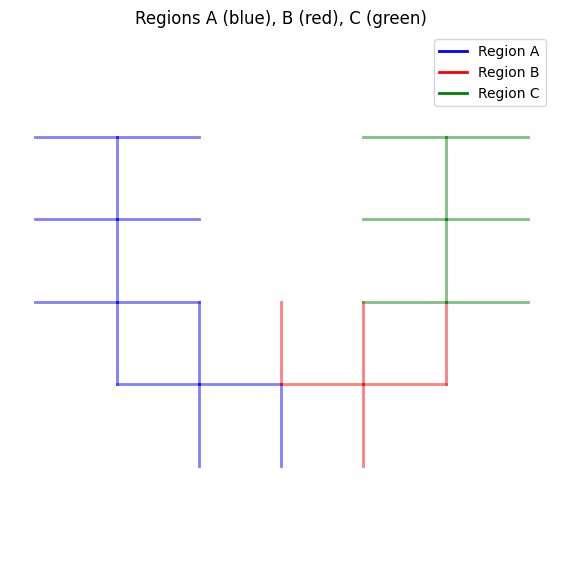

setA: {((2, 1), 'H'), ((0, 1), 'H'), ((0, 1), 'V'), ((2, 1), 'V'), ((3, 3), 'V'), ((2, 2), 'V'), ((1, 0), 'H'), ((1, 1), 'H'), ((1, 1), 'V'), ((0, 0), 'H'), ((3, 2), 'H'), ((3, 1), 'H'), ((3, 2), 'V'), ((2, 0), 'H')}
setB: {((3, 3), 'H'), ((3, 4), 'H'), ((3, 4), 'V'), ((2, 5), 'V'), ((2, 4), 'V'), ((2, 3), 'V')}
setC: {((2, 5), 'H'), ((1, 5), 'H'), ((1, 4), 'H'), ((2, 4), 'H'), ((1, 5), 'V'), ((0, 5), 'H'), ((0, 4), 'H'), ((0, 5), 'V')}
plaq_ABC: [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 1), (0, 4), (0, 5), (1, 4), (1, 5), (2, 4), (2, 5), (3, 4), (2, 2), (2, 3), (3, 2), (3, 3)]
plaq_AB: [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 1), (2, 4), (2, 5), (3, 4), (2, 2), (2, 3), (3, 2), (3, 3)]
plaq_BC: [(0, 4), (0, 5), (1, 4), (1, 5), (2, 4), (2, 5), (3, 4), (2, 2), (2, 3), (3, 3)]
plaq_B: [(2, 4), (2, 5), (3, 4), (2, 2), (2, 3), (3, 3)]


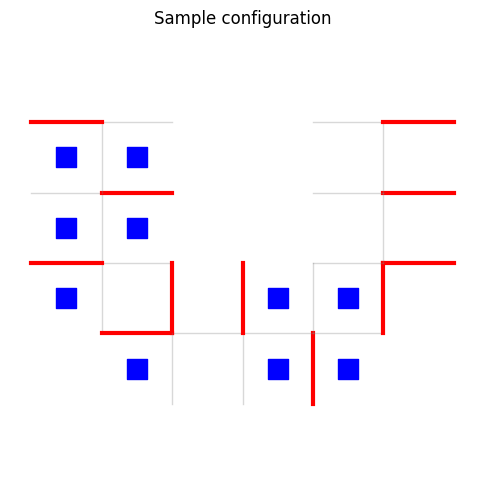

In [61]:

def plot_configuration(config, all_plaq, title=""):
    """
    Visualize the configuration:
      - Draw all edges (active edges in red, inactive edges in light gray).
      - For each plaquette (indexed by (r, c) for r, c in 0,...,n-1), compute the excitation.
        * If the plaquette is excited and not on the top boundary, mark it with a blue square.
        * If it is on the top boundary and excited, mark it with a green circle.
    """
    plt.figure(figsize=(6, 6))
    
    # Draw each edge.
    for edge, val in config.items():
        (r, c), typ = edge
        if typ == 'H':
            x1, y1 = c, r
            x2, y2 = c+1, r
        else:  # 'V'
            x1, y1 = c, r
            x2, y2 = c, r+1
        
        if val == 1:
            plt.plot([x1, x2], [y1, y2], color='red', lw=3)
        else:
            plt.plot([x1, x2], [y1, y2], color='gray', lw=1, alpha=0.3)
    
    # Check and mark excitations on plaquettes.
    for (r, c) in all_plaq:
        count = 0
        # The edges surrounding the plaquette at (r, c):
        edges = [((r, c), 'H'), ((r+1, c), 'H'), ((r, c), 'V'), ((r, c+1), 'V')]
        count = sum(config.get(e, 0) for e in edges)
        if count % 2 == 1:
            # Compute center of the plaquette.
            center_x = c + 0.5
            center_y = r + 0.5            
            plt.scatter(center_x, center_y, s=200, c='blue', marker='s')
            
    plt.title(title)
    # Optionally invert the y-axis so that the top row appears at the top.
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.axis('off')
    plt.show()

# ===== Main: Sample configurations and compute Renyi-2 weights for regions =====

n = 2        # Lattice size
CMI = []        # Store CMI values for each p.
std_CMI = []
all_plaq = list(chain(
    ((r, c) for r in range(2*n) for c in range(n)),
    ((r, c + 2*n) for r in range(2*n) for c in range(n)),
    ((r, c + n) for r in range(n, 2*n) for c in range(n))
))
allEdges = set(get_edges(n))

# Define A, B, C regions
setA, setB, setC = define_B_and_C(n)
# Intersect with allEdges to be safe:
setA = setA.intersection(allEdges)
setB = setB.intersection(allEdges)
setC = setC.intersection(allEdges)

# Define regions:
region_ABC = allEdges                   # Entire allowed lattice
region_AB  = setA.union(setB)
region_BC  = setB.union(setC)
region_B   = setB
region_C = setC
# For each region, get the list of plaquettes that are fully contained in it.
plaq_ABC = region_plaquettes(region_ABC, all_plaq)
plaq_AB  = region_plaquettes(region_AB, all_plaq)
plaq_BC  = region_plaquettes(region_BC, all_plaq)
plaq_B   = region_plaquettes(region_B, all_plaq)
plaq_C = region_plaquettes(region_C, all_plaq)
for p in np.linspace(0, 0.5, 10):         # Decoherence probability.
    num_samples = 1
    samples_ABC = sample_configurations(allEdges, num_samples)
    samples_AB  = sample_configurations(setA.union(setB), num_samples)
    samples_BC  = sample_configurations(setB.union(setC), num_samples)
    samples_B   = sample_configurations(setB, num_samples)
    # Now, for each sample, compute the region weight.
    weights_ABC = []
    weights_AB  = []
    weights_BC  = []
    weights_B   = []
    
    for cfg in samples_ABC:
        w_ABC = region_weight(cfg, plaq_ABC, p)
        weights_ABC.append(w_ABC)
    for cfg in samples_AB:
        w_AB  = region_weight(cfg, plaq_AB, p)
        weights_AB.append(w_AB)
    for cfg in samples_BC:
        w_BC  = region_weight(cfg, plaq_BC, p)
        weights_BC.append(w_BC)
    for cfg in samples_B:
        w_B   = region_weight(cfg, plaq_B,  p)
        weights_B.append(w_B)
    # The Renyi-2 entropy is S2 = -ln( Tr(rho_R^2) ). Here we use the average weight as a proxy.
    avg_ABC, var_ABC = np.average(weights_ABC), np.var(weights_ABC)
    avg_AB,  var_AB  = np.average(weights_AB),  np.var(weights_AB)
    avg_BC,  var_BC  = np.average(weights_BC),  np.var(weights_BC)
    avg_B,   var_B   = np.average(weights_B),   np.var(weights_B) 
    # (If the average weight is 0, that indicates that almost all configurations have leakage.)
    S2_ABC = -np.log(avg_ABC) if avg_ABC > 0 else 0
    S2_AB  = -np.log(avg_AB)  if avg_AB  > 0 else 0
    S2_BC  = -np.log(avg_BC)  if avg_BC  > 0 else 0
    S2_B   = -np.log(avg_B)   if avg_B   > 0 else 0
    CMI.append(-(S2_ABC - S2_AB - S2_BC + S2_B))
    std_CMI.append(np.sqrt((var_ABC/(avg_ABC+1e-16)**2)+(var_AB/(avg_AB+1e-16)**2)+(var_BC/(avg_BC+1e-16)**2)+(var_B/(avg_B+1e-16)**2)))
print("Renyi-2 entropy estimates:")
print("Region ABC (full):", S2_ABC)
print("Region AB:", S2_AB)
print("Region BC:", S2_BC)
print("Region B:", S2_B)
# Optionally, plot one of the samples.
plot_regions(n)
print("plaq_ABC:", plaq_ABC)
print("plaq_AB:", plaq_AB)
print("plaq_BC:", plaq_BC)
print("plaq_B:", plaq_B)
plot_configuration(samples_ABC[-1], all_plaq, title="Sample configuration")
    

[0.0, 0.7041651942868876, 1.627911147619341, 3.221378923551634, 6.073276005777626, 12.60063663703475, 24.62648975466605, 40.61339032514065, 55.21181779733591, 110.18661819840713]


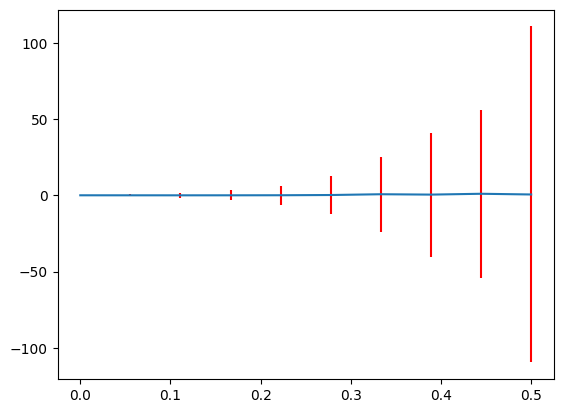

In [33]:
import matplotlib.pyplot as plt
plt.errorbar(np.linspace(0, 0.5, 10), CMI, yerr=std_CMI, ecolor='red')
print(std_CMI)

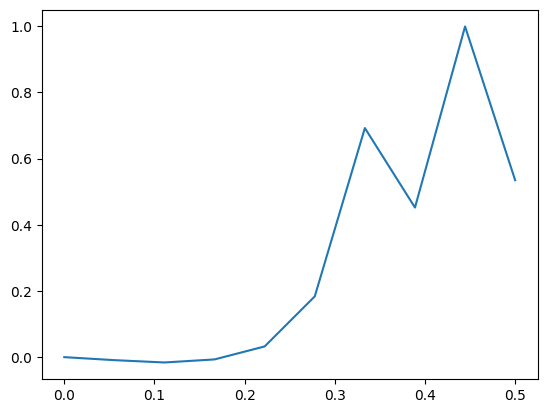

In [34]:
plt.plot(np.linspace(0, 0.5, 10), CMI)

In [51]:
from itertools import product

def all_renyi_configs(edges):
    """
    Generate all configurations: each edge can be 0 or 1.
    Yields dictionaries mapping each edge to 0 or 1.
    """
    for states in product([0, 1], repeat=len(edges)):
        yield dict(zip(edges, states))

In [ ]:
exp_S2_B = 0
exp_S2_AB = 0
exp_S2_BC = 0
exp_S2_ABC = 0
CMI_exact = []
p = 0.5

exp_S2_B = 0
exp_S2_AB = 0
exp_S2_BC = 0
exp_S2_ABC = 0
for config in all_renyi_configs(setB):
    w_B = region_weight(config, plaq_B, p)
    exp_S2_B += w_B
for config in all_renyi_configs(setA.union(setB)):
    w_AB = region_weight(config, plaq_AB, p)
    exp_S2_AB += w_AB
for config in all_renyi_configs(setB.union(setC)):
    w_BC = region_weight(config, plaq_BC, p)
    exp_S2_BC += w_BC
for config in all_renyi_configs(allEdges):
    w_ABC = region_weight(config, plaq_ABC, p)
    exp_S2_ABC += w_ABC
    
S2_B = -np.log(exp_S2_B)
S2_AB = -np.log(exp_S2_AB)
S2_BC = -np.log(exp_S2_BC)
S2_ABC = -np.log(exp_S2_ABC)
CMI_exact.append(-(S2_ABC - S2_AB - S2_BC + S2_B))


In [ ]:
print(CMI_exact)

In [63]:
print(CMI_exact)

[0.13469482831753554]


In [ ]:
exp_S2_B = 0
for config in all_renyi_configs(setB):
    w_B = region_weight(config, plaq_B, p)
    exp_S2_B += w_B
S2_B = -np.log(exp_S2_B)
print(S2_B, n)

In [83]:

exp_S2_BC = 0
for config in all_renyi_configs(setB.union(setC)):
    w_BC = region_weight(config, plaq_BC, p)
    exp_S2_BC += w_BC
S2_BC = -np.log(exp_S2_BC)
print(S2_BC, n)

-2.772588722239781 2


In [60]:
x = 0.
import time
t0 = time.time()
for i in range(100000000):
    x += i
print(time.time() - t0)

7.393093585968018


In [ ]:
'''
Previous code for doing Metropolis-Hastings sampling.(Not working)

def is_edge_in_D(edge):
    """
    Decide whether an edge lies in the D region.
    For an edge labeled ((r, c), typ):
      - For a horizontal edge ('H'), its midpoint is (c + 0.5, r).
      - For a vertical edge ('V'), its midpoint is (c, r + 0.5).
    In this example we define region D as a rectangle:
      x between 1 and 3 and y between 1 and 3.
    You can adjust these numbers to match your desired shape.
    """
    (r, c), typ = edge
    if typ == 'H':
        x = c + 0.5
        y = r
    else:  # 'V'
        x = c
        y = r + 0.5
        
    if 1 < x < 3 and 0 <= y <= 2:
        return True
    if 5 < x < 7 and 0 <= y <= 2:
        return True
    if x == 2 and y == 2.5:
        return True
    if x == 6 and y == 2.5:
        return True
    return False

def get_edges_excluding_D(n):
    """
    Return a list of all edges for an n x n lattice EXCEPT those that lie in the D region.
    The full set of edges (before removal) is:
      - Horizontal: ((r, c), 'H') for r = 0,..., n and c = 0,..., n-1.
      - Vertical:   ((r, c), 'V') for r = 0,..., n-1 and c = 0,..., n.
    We remove an edge if is_edge_in_D(edge) returns True.
    """
    edges = []
    # Horizontal edges.
    for r in range(n+1):
        for c in range(n):
            edge = ((r, c), 'H')
            if not is_edge_in_D(edge):
                edges.append(edge)
    # Vertical edges.
    for r in range(n):
        for c in range(n+1):
            edge = ((r, c), 'V')
            if not is_edge_in_D(edge):
                edges.append(edge)
    return edges

def generate_initial_config(n):
    """
    Generate the initial configuration: a dictionary for all edges (not in D) set to 0 (inactive).
    """
    edges = get_edges_excluding_D(n)
    config = {}
    for e in edges:
        config[e] = 0
    return config

def get_middle_plaqs():
    """
    Define the six middle plaquettes.
    (Here chosen as those with top-left corners (3,3), (3,4), (3,5), (4,3), (4,4), (4,5).)
    Adjust as needed.
    """
    return [(0,3), (0,4),
            (1,3), (1,4),
            (2,3), (2,4)] 

def edges_of_plaquette(r, c):
    """
    Return the 4 canonical edges of plaquette (r,c).
    """
    return [((r, c), 'H'),
            ((r+1, c), 'H'),
            ((r, c), 'V'),
            ((r, c+1), 'V')]

def define_B_and_C(n):
    """
    Define regions B and C for an n x n lattice.
      - C: edges belonging to the middle six plaquettes.
      - B: edges belonging to plaquettes that neighbor the middle plaquettes but are not in C.
      - A: the remainder.
    """
    middle = get_middle_plaqs()
    setC = set()
    for (r, c) in middle:
        for e in edges_of_plaquette(r, c):
            setC.add(e)
    all_edges = set(get_edges_excluding_D(n))
    def neighbors(r, c):
        res = []
        if r > 0: res.append((r-1, c))
        if r < n-1: res.append((r+1, c))
        if c > 0: res.append((r, c-1))
        if c < n-1: res.append((r, c+1))
        return res
    middle_set = set(middle)
    boundary_plaq = set()
    for (r,c) in middle:
        for nbr in neighbors(r, c):
            if nbr not in middle_set:
                boundary_plaq.add(nbr)
    setB = set()
    for (r,c) in boundary_plaq:
        for e in edges_of_plaquette(r, c):
            if e not in setC:
                setB.add(e)
    setA = all_edges - setB - setC
    return setA, setB, setC



def dual_loop_update(config, n):
    """
    Pick a random vertex (from the (n+1) x (n+1) grid) and flip all edges
    in the configuration that are incident to that vertex.
    Only those edges that are present in the config (i.e. not removed) will be flipped.
    """
    # Choose a random vertex coordinate.

    vertex = (random.randint(0, n), random.randint(0, n))
    r, c = vertex
    incident_edges = []
    # Candidate incident edges:
    # Edge to the right (horizontal) from (r, c)
    if ((r, c), 'H') in config:
        incident_edges.append(((r, c), 'H'))
    # Edge to the left (horizontal) from (r, c-1)
    if c > 0 and (((r, c-1), 'H') in config):
        incident_edges.append(((r, c-1), 'H'))
    # Edge below (vertical) from (r, c)
    if ((r, c), 'V') in config:
        incident_edges.append(((r, c), 'V'))
    # Edge above (vertical) from (r-1, c)
    if r > 0 and (((r-1, c), 'V') in config):
        incident_edges.append(((r-1, c), 'V'))
        
    # Flip all incident edges.
    for edge in incident_edges:
        if len(incident_edges) == 4:
            config[edge] = 1 - config[edge]
    return config
'''